In [63]:
import pandas as pd

In [64]:
teams = pd.read_csv("teams.csv")

In [65]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [66]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [67]:
# teams.corr()["medals"]
corr = teams.drop(["team", "country"], axis=1).corr()["medals"]
print(corr)

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64


In [68]:
import seaborn as sns

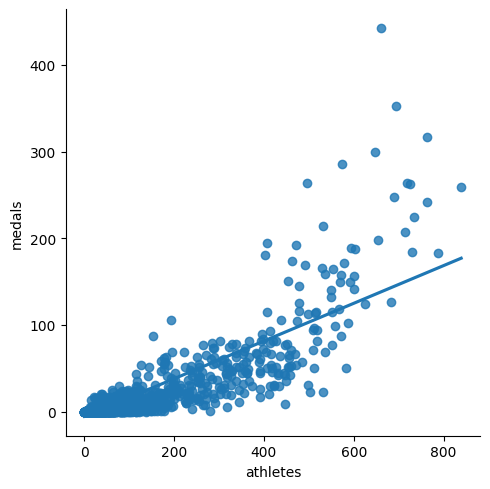

In [99]:
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True, ci=None)

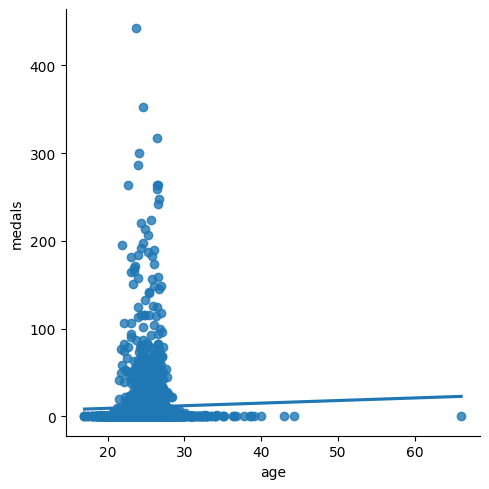

In [70]:
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True, ci=None)

In [71]:
teams[teams.isnull().any(axis=1)].head(20)

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


In [72]:
teams = teams.dropna()

In [73]:
teams.shape

(2014, 7)

In [74]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [75]:
train.shape

(1609, 7)

In [76]:
test.shape

(405, 7)

In [77]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [78]:
predictors = ["athletes", "prev_medals"]

In [79]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [80]:
predictions = reg.predict(test[predictors])

In [81]:
predictions.shape

(405,)

In [ ]:
test["predictions"] = predictions
print(test)

In [83]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [84]:
test["predictions"] = test["predictions"].round()

In [85]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [86]:
test.describe()["medals"]

count    405.000000
mean       9.785185
std       28.820300
min        0.000000
25%        0.000000
50%        0.000000
75%        5.000000
max      264.000000
Name: medals, dtype: float64

In [87]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [88]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [89]:
errors = (test["medals"] - predictions).abs()

In [90]:
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team

In [95]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

<Axes: ylabel='Frequency'>

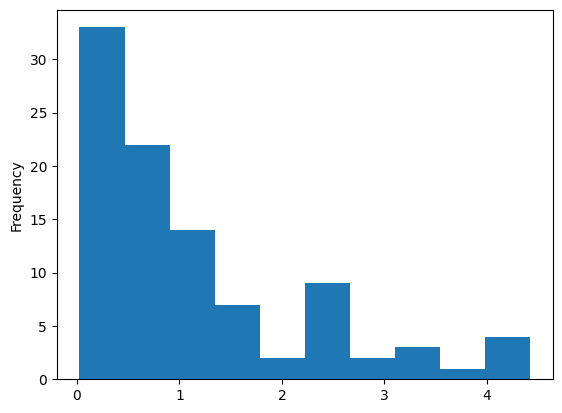

In [94]:
error_ratio.plot.hist()

In [96]:
error_ratio.sort_values()

team
FRA    0.024289
CAN    0.050844
NZL    0.071349
RUS    0.081841
ITA    0.119537
         ...   
PHI    3.563248
JOR    4.065175
BDI    4.136878
AUT    4.257950
NIG    4.423693
Name: medals, Length: 97, dtype: float64

In [97]:
error_ratio["USA"]

0.12820711929797923